In [2]:
#load packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from bokeh.io import output_file, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import ColumnDataSource, HoverTool

## Business Dataframe

In [3]:
business=pd.read_csv('dataset-capstone/business.csv',low_memory=False)

In [4]:
business.head()

,is_open,hours.Thursday,attributes.BYOB,hours.Monday,attributes.DriveThru,state,attributes,hours.Saturday,attributes.BusinessParking,postal_code,...,hours.Friday,attributes.GoodForDancing,attributes.GoodForMeal,attributes.ByAppointmentOnly,attributes.HappyHour,hours.Wednesday,hours,attributes.RestaurantsTakeOut,hours.Tuesday,attributes.Smoking
0,0,NaN,NaN,NaN,NaN,AZ,{'GoodForKids': 'False'},NaN,NaN,85016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,9:0-0:0,NaN,9:0-0:0,NaN,ON,"{'RestaurantsReservations': 'True', 'GoodForMe...",9:0-1:0,"{'garage': False, 'street': False, 'validated'...",L5R 3E7,...,9:0-1:0,NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,9:0-0:0,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True,9:0-0:0,NaN
2,1,17:30-21:30,NaN,17:30-21:30,NaN,NC,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",17:30-22:0,"{'garage': False, 'street': False, 'validated'...",28210,...,17:30-22:0,NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,17:30-21:30,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True,NaN,NaN
3,1,8:0-17:0,NaN,8:0-17:0,NaN,AZ,NaN,NaN,NaN,85338,...,8:0-17:0,NaN,NaN,NaN,NaN,8:0-17:0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",NaN,8:0-17:0,NaN
4,1,7:0-23:0,NaN,7:0-23:0,NaN,NC,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",7:0-23:0,NaN,28217,...,7:0-23:0,NaN,NaN,True,NaN,7:0-23:0,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",NaN,7:0-23:0,NaN


In [5]:
sorted(business.columns)

['address',
 'attributes',
 'attributes.AcceptsInsurance',
 'attributes.AgesAllowed',
 'attributes.Alcohol',
 'attributes.Ambience',
 'attributes.BYOB',
 'attributes.BYOBCorkage',
 'attributes.BestNights',
 'attributes.BikeParking',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.BusinessParking',
 'attributes.ByAppointmentOnly',
 'attributes.Caters',
 'attributes.CoatCheck',
 'attributes.Corkage',
 'attributes.DietaryRestrictions',
 'attributes.DogsAllowed',
 'attributes.DriveThru',
 'attributes.GoodForDancing',
 'attributes.GoodForKids',
 'attributes.GoodForMeal',
 'attributes.HairSpecializesIn',
 'attributes.HappyHour',
 'attributes.HasTV',
 'attributes.Music',
 'attributes.NoiseLevel',
 'attributes.Open24Hours',
 'attributes.OutdoorSeating',
 'attributes.RestaurantsAttire',
 'attributes.RestaurantsCounterService',
 'attributes.RestaurantsDelivery',
 'attributes.RestaurantsGoodForGroups',
 'attributes.RestaurantsPriceRange2',
 'attributes

In [6]:
business.shape

(192609, 60)

In [7]:
business.categories.head(20)

0                                     Golf, Active Life
1     Specialty Food, Restaurants, Dim Sum, Imported...
2                     Sushi Bars, Restaurants, Japanese
3                         Insurance, Financial Services
4     Plumbing, Shopping, Local Services, Home Servi...
5     Shipping Centers, Couriers & Delivery Services...
6                            Beauty & Spas, Hair Salons
7     Hair Salons, Hair Stylists, Barbers, Men's Hai...
8                  Nail Salons, Beauty & Spas, Day Spas
9         Beauty & Spas, Nail Salons, Day Spas, Massage
10    Local Services, Professional Services, Compute...
11    Restaurants, Breakfast & Brunch, Mexican, Taco...
12    Bars, Nightlife, Pubs, Barbers, Beauty & Spas,...
13           Italian, Restaurants, Pizza, Chicken Wings
14                                       Bakeries, Food
15             Fitness & Instruction, Active Life, Yoga
16    Hair Stylists, Beauty & Spas, Hair Salons, Men...
17                                 Restaurants, 

In [8]:
#Keep only restaurants

restaurants=business[(business.categories.str.contains('Restaurants'))  | (business.categories.str.contains('Food'))]
restaurants.shape

(74587, 60)

In [9]:
#different states represented in the dataset and their value counts
restaurants.state.value_counts()

ON     18386
AZ     14785
NV     10061
OH      6777
QC      6651
NC      5550
PA      5061
AB      3845
WI      2133
IL       813
SC       493
NY        13
XGM        2
XWY        2
AL         2
CA         1
BAS        1
NM         1
TX         1
VA         1
CON        1
XGL        1
FL         1
NE         1
BC         1
AR         1
VT         1
WA         1
Name: state, dtype: int64

In [10]:
restaurants[restaurants.state=='NV'].city.value_counts()

Las Vegas                  8285
Henderson                  1171
North Las Vegas             482
Boulder City                 68
Paradise                      7
Spring Valley                 7
N Las Vegas                   7
Nellis AFB                    4
Enterprise                    3
Las  Vegas                    3
N. Las Vegas                  3
Blue Diamond                  3
Las vegas                     2
Nellis Air Force Base         2
South Las Vegas               2
LAS VEGAS                     2
Pahrump                       1
Clark                         1
Green Valley                  1
W Henderson                   1
Summerlin                     1
Sunrise Manor                 1
Summerlin South               1
NELLIS AFB                    1
Henderson and Las vegas       1
LasVegas                      1
Name: city, dtype: int64

In [11]:
#different cities represented in the dataset and their value counts

restaurants.city.value_counts().head(30)

Toronto            10093
Las Vegas           8286
Phoenix             5130
Montréal            4540
Calgary             3694
Charlotte           3491
Pittsburgh          3124
Scottsdale          2004
Cleveland           1813
Mississauga         1732
Mesa                1504
Madison             1393
Tempe               1342
Henderson           1171
Chandler            1120
Markham             1055
Glendale             912
Gilbert              784
Brampton             624
Scarborough          613
Richmond Hill        606
North York           573
Vaughan              569
Champaign            509
North Las Vegas      482
Peoria               480
Concord              427
Etobicoke            395
Laval                315
Surprise             312
Name: city, dtype: int64

In [12]:
# The various columns starting with attributes are created for the different attributes of each business and will be 
# dropped for this analysis.I# will keep the original attribute column that contains the dictionary and can be trasnformed
# to a one hot vector


cols = [c for c in restaurants.columns if not c.startswith('attributes.')]
restaurants=restaurants[cols]
restaurants.shape

(74587, 21)

In [13]:
#Same for the hours that each business is open. 

cols = [c for c in restaurants.columns if not c.startswith('hours')]
restaurants=restaurants[cols]
restaurants.shape

(74587, 13)

In [14]:
restaurants.is_open.value_counts()

1    54459
0    20128
Name: is_open, dtype: int64

In [15]:
#Keep restaurants in Nevada (Greater Las Vegas Area)
LV_restaurants=restaurants[restaurants.state=='NV']
LV_restaurants.shape

(10061, 13)

In [16]:
LV_restaurants.is_open.value_counts()

1    6864
0    3197
Name: is_open, dtype: int64

In [17]:
#Keep only open restaurants
LV_restaurants=LV_restaurants[LV_restaurants.is_open==1]
LV_restaurants.shape

(6864, 13)

In [18]:
LV_restaurants.attributes

25        {'BikeParking': 'True', 'BusinessParking': "{'...
43        {'RestaurantsPriceRange2': '1', 'BusinessAccep...
111                                                     NaN
128       {'BusinessParking': "{'garage': False, 'street...
156       {'DriveThru': 'False', 'RestaurantsAttire': "'...
                                ...                        
192475    {'Alcohol': "u'none'", 'BusinessParking': "{'g...
192507    {'RestaurantsTakeOut': 'True', 'RestaurantsDel...
192562    {'Caters': 'True', 'RestaurantsTableService': ...
192573    {'BusinessAcceptsCreditCards': 'True', 'BikePa...
192598    {'OutdoorSeating': 'True', 'WiFi': "u'free'", ...
Name: attributes, Length: 6864, dtype: object

## Checkin DataFrame - Add number of checkins in Restaurants Dataframe

In [30]:
#4th dataset is the datetimes of check-ins at each business

checkin=pd.read_csv('dataset-capstone/checkin.csv',low_memory=False)

In [31]:
checkin.shape

(161950, 2)

We will create a new column with number of checkins for each business. This can be added to the business dataframe as a metric of foot traffic for machine learning models

In [21]:
checkin.date=checkin.date.str.split(',')
checkin['checkin_count']=checkin.date.str.len()

In [22]:
checkin=checkin[['business_id','checkin_count']]
checkin.head()

,business_id,checkin_count
0,--1UhMGODdWsrMastO9DZw,6
1,--6MefnULPED_I942VcFNA,167
2,--7zmmkVg-IMGaXbuVd0SQ,180
3,--8LPVSo5i0Oo61X01sV9A,1
4,--9QQLMTbFzLJ_oT-ON3Xw,37


In [23]:
#Update restaurants with number of checkins

LV_restaurants=pd.merge(how='left',left=LV_restaurants, right=checkin, left_on='business_id', right_on='business_id')
LV_restaurants.head()

,is_open,state,attributes,postal_code,latitude,longitude,name,city,business_id,categories,address,stars,review_count,checkin_count
0,1,NV,"{'BikeParking': 'True', 'BusinessParking': ""{'...",89156,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,Las Vegas,tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",6055 E Lake Mead Blvd,4.5,184,458.0
1,1,NV,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",89115,36.236053,-115.096454,Three Square,Las Vegas,NBn4hgfGtNz91k3VsDZlmw,"Local Services, Food Banks, Community Service/...",4190 N Pecos Rd,5.0,44,475.0
2,1,NV,NaN,89030,36.238596,-115.233331,Imperial Asian Buffet,Las Vegas,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",4343 N Rancho Dr,2.0,4,15.0
3,1,NV,"{'BusinessParking': ""{'garage': False, 'street...",89134,36.191852,-115.304983,Starbucks,Las Vegas,sKhDrZFCJqfRNylkHrIDsQ,"Food, Coffee & Tea","1990 Village Center Circle, Suite 1",4.0,76,1584.0
4,1,NV,"{'DriveThru': 'False', 'RestaurantsAttire': ""'...",89012,36.010745,-115.064803,Served,Henderson,jScBTQtdAt-8RshaiBEHgw,"Ethnic Food, American (New), Burgers, Food, Re...","1770 W Horizon Ridge, Ste 100",4.5,664,1430.0


In [24]:
# How many restaurants do not have checkins?
LV_restaurants.checkin_count.isnull().sum()

111

In [25]:
LV_restaurants.shape

(6864, 14)

In [26]:
def merc_projection(Coordinates):
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)
    

lv_coord=[36.19,-115.14]
lv_merc_coord=merc_projection(lv_coord)
lv_merc_coord

(-12817326.16993752, 4326796.671870625)

In [28]:
LV_restaurants['coord_tuple']=LV_restaurants[['latitude','longitude']].apply(tuple, axis=1)
LV_restaurants['merc_x'] = LV_restaurants['coord_tuple'].apply(lambda x: merc_projection(x)[0])
LV_restaurants['merc_y'] = LV_restaurants['coord_tuple'].apply(lambda x: merc_projection(x)[1])
LV_restaurants=LV_restaurants.drop(columns=['coord_tuple'])

LV_restaurants.head()

,is_open,state,attributes,postal_code,latitude,longitude,name,city,business_id,categories,address,stars,review_count,checkin_count,merc_x,merc_y
0,1,NV,"{'BikeParking': 'True', 'BusinessParking': ""{'...",89156,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,Las Vegas,tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",6055 E Lake Mead Blvd,4.5,184,458.0,-1.280625e+07,4.327571e+06
1,1,NV,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",89115,36.236053,-115.096454,Three Square,Las Vegas,NBn4hgfGtNz91k3VsDZlmw,"Local Services, Food Banks, Community Service/...",4190 N Pecos Rd,5.0,44,475.0,-1.281248e+07,4.333151e+06
2,1,NV,NaN,89030,36.238596,-115.233331,Imperial Asian Buffet,Las Vegas,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",4343 N Rancho Dr,2.0,4,15.0,-1.282772e+07,4.333502e+06
3,1,NV,"{'BusinessParking': ""{'garage': False, 'street...",89134,36.191852,-115.304983,Starbucks,Las Vegas,sKhDrZFCJqfRNylkHrIDsQ,"Food, Coffee & Tea","1990 Village Center Circle, Suite 1",4.0,76,1584.0,-1.283569e+07,4.327052e+06
4,1,NV,"{'DriveThru': 'False', 'RestaurantsAttire': ""'...",89012,36.010745,-115.064803,Served,Henderson,jScBTQtdAt-8RshaiBEHgw,"Ethnic Food, American (New), Burgers, Food, Re...","1770 W Horizon Ridge, Ste 100",4.5,664,1430.0,-1.280896e+07,4.302100e+06


In [29]:
LV_restaurants.shape

(6864, 16)

In [36]:
#Export tables to csv to reduce dataset size
LV_restaurants.to_csv('dataset-capstone/LV_restaurants.csv')

In [14]:
#Read the csv above to avoid reloading the whole dataset
LV_restaurants=pd.read_csv('dataset-capstone/LV_restaurants.csv')
LV_restaurants=LV_restaurants.drop(columns=['Unnamed: 0'])

In [41]:
#Create a dataframe with Las Vegas Business IDs to map the rest of the dataframes
LV_restaurants_ID=LV_restaurants.business_id
LV_restaurants_ID

0       tstimHoMcYbkSC4eBA1wEg
1       NBn4hgfGtNz91k3VsDZlmw
2       X8mtoSxY8whtmbDlj0D3Aw
3       sKhDrZFCJqfRNylkHrIDsQ
4       jScBTQtdAt-8RshaiBEHgw
                 ...          
6859    p5rpYtxS5xPQjt3MXYVEwA
6860    3L4VPQXH3ni8IsuJLnd74g
6861    ngs16C2M_uTq2zXamltHVw
6862    6A6wbLDM1wIG--6psAOqLQ
6863    vIAEWbTJc657yN8I4z7whQ
Name: business_id, Length: 6864, dtype: object

In [101]:
LV_restaurants[LV_restaurants.business_id=='aZs_IrhA7rvuLBumVhJjCw']

,is_open,state,attributes,postal_code,latitude,longitude,name,city,business_id,categories,address,stars,review_count,checkin_count,merc_x,merc_y,categories_list


In [15]:
#Convert categories column to list to index for search and count categories. Add to app_project.py

LV_restaurants['categories_list']=LV_restaurants.categories.str.split(', ')

def restaurant_selection(selection=['Mexican']):
#selection = ['Mexican']
    mask = LV_restaurants.categories_list.apply(lambda x: any(item for item in selection if item in x))
    df = LV_restaurants[mask]
    return df.sort_values(['stars','review_count'],ascending=[False, False]).head(10)


In [16]:
LV_restaurants.categories_list.str.len()

0        6
1        3
2        2
3        2
4       11
        ..
6859    13
6860     2
6861     7
6862     8
6863     2
Name: categories_list, Length: 6864, dtype: int64

Text(0, 0.5, 'Number of Las Vegas Restaurants')

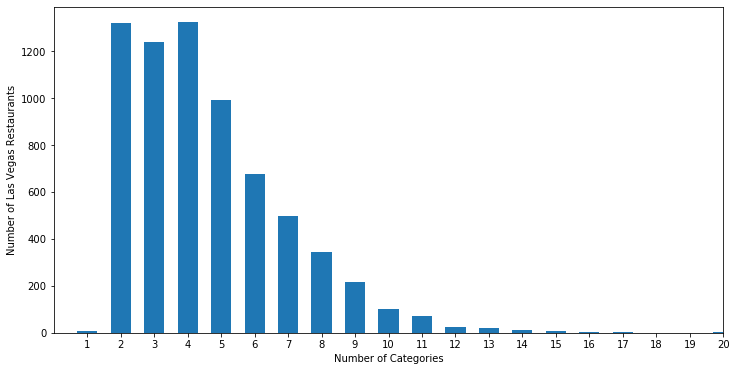

In [78]:
x = LV_restaurants.categories_list.str.len().value_counts().index
y = LV_restaurants.categories_list.str.len().value_counts().values

plt.figure(figsize=(12,6))
plt.xticks(np.arange(min(x), max(x), 1.0))
plt.xlim(0,20)

plt.bar(x, y, width=.6)
plt.xlabel('Number of Categories')
plt.ylabel('Number of Las Vegas Restaurants')

In [90]:
#Most common categories for Las Vegas Restaurants

LV_restaurants.categories_list.apply(pd.Series).stack().value_counts().head(30)

Restaurants                  5120
Food                         3158
Fast Food                    1065
Nightlife                     858
Bars                          810
American (Traditional)        799
Coffee & Tea                  747
Mexican                       721
Sandwiches                    713
Burgers                       587
Pizza                         579
American (New)                539
Breakfast & Brunch            517
Specialty Food                433
Shopping                      428
Convenience Stores            426
Desserts                      377
Event Planning & Services     376
Grocery                       357
Chinese                       353
Italian                       323
Seafood                       317
Bakeries                      288
Gas Stations                  277
Beer                          267
Wine & Spirits                267
Salad                         267
Chicken Wings                 264
Japanese                      263
Juice Bars & S

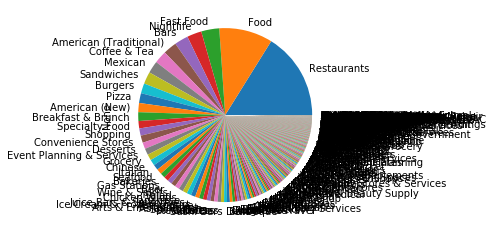

In [74]:
LV_restaurants.categories_list.apply(pd.Series).stack().value_counts().plot.pie()


## Create Maps 

In [198]:
tile_provider = get_provider(Vendors.CARTODBPOSITRON_RETINA)
source = ColumnDataSource(data=dict(
                        x=list(LV_restaurants['merc_x']), 
                        y=list(LV_restaurants['merc_y']),
                        categories=list(LV_restaurants['categories']),
                        stars=list(LV_restaurants['stars']),
                        restaurant_name=list(LV_restaurants['name'])))
hover = HoverTool(tooltips=[
    ("name", "@restaurant_name"),
    ("stars","@stars"),
    ("categories","@categories")
    
])
# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", 
           y_axis_type="mercator",
           tools=[hover, 'wheel_zoom','save'])
p.add_tile(tile_provider)
p.circle(x='x',
         y='y', 
         source=source,
         size='stars',
         line_color="red", 
         fill_color="red",
         fill_alpha=0.1)
    
output_notebook()
show(p)

Loading BokehJS ...

In [11]:

#map_range=20000
tile_provider = get_provider(Vendors.CARTODBPOSITRON_RETINA)

# range bounds supplied in web mercator coordinates
p = figure(#x_range=(lv_merc_coord[0]-map_range, lv_merc_coord[0]+map_range),
           #y_range=(lv_merc_coord[1]-map_range, lv_merc_coord[1]+map_range),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

p.circle(x = LV_restaurants['merc_x'],
         y = LV_restaurants['merc_y'])

show(p)

## Tips Dataframe

In [33]:
#We Load the first dataset containing the tips and explore the columns
tip=pd.read_csv('dataset-capstone/tip.csv',low_memory=False)

In [34]:
tip.shape

(1223094, 5)

In [35]:
tip.head()

,date,compliment_count,user_id,text,business_id
0,2014-03-27 03:51:24,0,UPw5DWs_b-e2JRBS-t37Ag,"Great for watching games, ufc, and whatever el...",VaKXUpmWTTWDKbpJ3aQdMw
1,2013-05-25 06:00:56,0,Ocha4kZBHb4JK0lOWvE0sg,Happy Hour 2-4 daily with 1/2 price drinks and...,OPiPeoJiv92rENwbq76orA
2,2011-12-26 01:46:17,0,jRyO2V1pA4CdVVqCIOPc1Q,Good chips and salsa. Loud at times. Good serv...,5KheTjYPu1HcQzQFtm4_vw
3,2014-03-23 21:32:49,0,FuTJWFYm4UKqewaosss1KA,The setting and decoration here is amazing. Co...,TkoyGi8J7YFjA6SbaRzrxg
4,2012-10-06 00:19:27,0,LUlKtaM3nXd-E4N4uOk_fQ,Molly is definately taking a picture with Sant...,AkL6Ous6A1atZejfZXn1Bg


In [36]:
LV_tips=pd.merge(how='left',left=LV_restaurants_ID, right=tip, left_on='business_id', right_on='business_id')

In [37]:
#How many Las Vegas restaurants do not have tips?

LV_tips.text.isnull().sum()

315

In [39]:
#save to csv
LV_tips.to_csv('dataset-capstone/LV_tips.csv')

In [145]:
#Read the csv above to avoid reloading the whole dataset and process columns and NaN values
LV_tips=pd.read_csv('dataset-capstone/LV_tips.csv')
LV_tips=LV_tips.drop(columns=['Unnamed: 0','date'])
LV_tips=LV_tips.rename(columns={"text": "tip"})
LV_tips=LV_tips.dropna()

In [146]:
LV_tips.sort_values(by='compliment_count', ascending=False)

,business_id,compliment_count,user_id,tip
105910,D6K3VT6S8FwFm4u5uN8T8g,8.0,A5A34ixb-yy6nwL42iZsnw,"WARNING, TMI to follow: After multiple therape..."
148761,fcWkZgmzRsm3H4egzSrV_A,6.0,mkbx55W8B8aPLgDqex7qgg,Ordered a plate of roasted duck and it never g...
145899,oyh1CYVHDiAyDtF-ug8y3w,6.0,rRrFcSEZOTw6iZagsIwTFQ,Do yourself a favor and read the owner's respo...
204187,GI-CAiZ_Gg3h21PwrANB4Q,6.0,q9jCDNZDRUYl2Pwlgxocig,Request table in their treehouse. More private...
134373,RESDUcs7fIiihp38-d6_6g,5.0,rKDLq635fyrmVzg4Gxkafg,The definition of Bacchanal:\r\nFeast worthy o...
...,...,...,...,...
96082,rtlsfmdufArhk-47sWIf2w,0.0,w-w-k-QXosIKQ8HQVwU6IQ,Their lobster risotto is not as good as Sona's...
96083,rtlsfmdufArhk-47sWIf2w,0.0,5vJE4ploStTJHi3PH0YqIA,"Tasting menu was amazing, wine pairing also! T..."
96084,rtlsfmdufArhk-47sWIf2w,0.0,Qbm-Oh2uk4_w6wSQl4Docw,Excellent food. Amazing staff! 10/10
96085,rtlsfmdufArhk-47sWIf2w,0.0,53bZ_EsXH71L7iFs5MP9_w,There was a rezi mix up and they still honored...


In [147]:
LV_tips.groupby('business_id').count().sort_values('tip')

,compliment_count,user_id,tip
business_id,,,
UUG3NnmxOUnBlQ2i3peeHQ,1,1,1
hKp3VM4rEsrAB5NgHXvGAQ,1,1,1
hJApSwheuQhctflM4fAhYA,1,1,1
h-vvpbPlzrR2KrjVvqBMrA,1,1,1
guNwEuspisHQ34ONA1SLRA,1,1,1
...,...,...,...
RESDUcs7fIiihp38-d6_6g,1264,1264,1264
hihud--QRriCYZw1zZvW4g,1371,1371,1371
K7lWdNUhCbcnEvI0NhGewg,1386,1386,1386


## Reviews Dataframe

In [ ]:
#huge dataframe will crash the kernel
review=pd.read_csv('review.csv'),low_memory=False)

In [98]:
#Since we need only text, stars and mapping to business I will preprocess the chunks
def review_preprocess(chunk):
    chunk=chunk[['stars','text','business_id','user_id']]
    return chunk

In [99]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in pd.read_csv('dataset-capstone/review.csv', chunksize=100000):  
    # perform data filtering 
    chunk_filter = review_preprocess(chunk)
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk_filter)
    
# concat the list into dataframe 
reviews = pd.concat(chunk_list)
reviews

,stars,text,business_id,user_id
0,1.0,Total bill for this horrible service? Over $8G...,ujmEBvifdJM6h6RLv4wQIg,hG7b0MtEbXx5QzbzE6C_VA
1,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,NZnhc2sEQy3RmzKTZnqtwQ,yXQM5uF2jS6es16SJzNHfg
2,5.0,I have to say that this office really has it t...,WTqjgwHlXbSFevF32_DJVw,n6-Gk65cPZL6Uz8qRm3NYw
3,5.0,Went in for a lunch. Steak sandwich was delici...,ikCg8xy5JIg_NGPx-MSIDA,dacAIZ6fTM6mqwW5uxkskg
4,1.0,Today was my second out of three sessions I ha...,b1b1eb3uo-w561D0ZfCEiQ,ssoyf2_x0EQMed6fgHeMyQ
...,...,...,...,...
6685895,5.0,I have been coming here for years and this pla...,RXBFk3tVBxiTf3uOt9KExQ,Xu_YazIajfsc7SRj1wJ6Mg
6685896,1.0,I think this owner and the owner of Amy's Baki...,yA6dKNm_zl1ucZCnwW8ZCg,V6BjjQICDO4q7TT3ZhaPWw
6685897,5.0,"Off the grid Mexican in Vegas. Very tasty, qua...",a192hdM0_UVCYLwPJv1Qwg,PFiIECX8wuvi7P-1mCvIjA
6685898,5.0,We hired Taco Naco to cater our family party a...,kOo4ZY2UQAX4j312mzQ8mA,wu5R5_N7q5iqCBh6NBX26Q


In [103]:
reviews[reviews.business_id=='aZs_IrhA7rvuLBumVhJjCw']

,stars,text,business_id,user_id


In [104]:
LV_reviews = pd.merge(how='left',left=LV_restaurants_ID, right=reviews, left_on='business_id', right_on='business_id')


In [105]:
#How many Las Vegas restaurants do not have reviews?

LV_reviews.text.isnull().sum()

1

In [20]:
LV_reviews.head()

,business_id,stars,text,user_id
0,tstimHoMcYbkSC4eBA1wEg,4.0,We found out about this gem from The Man's co-...,Gvv5hQR8BYj5f-APtKwImQ
1,tstimHoMcYbkSC4eBA1wEg,3.0,"The ""chips"" are a fried corn tortilla which we...",b-y736LEcRWXoNFj82AcOw
2,tstimHoMcYbkSC4eBA1wEg,4.0,The pollo mole is well worth the trip out here...,_7_Bh8VaUTUgFhmQ59ml0g
3,tstimHoMcYbkSC4eBA1wEg,3.0,I've ordered Caldo de Rez from here twice and ...,PFdPopcevMX7_2cx27rJKA
4,tstimHoMcYbkSC4eBA1wEg,5.0,My boyfriend doesn't like Mexican food yet he ...,IxBVL9K2K9aur-_zKvIJiw


In [106]:
LV_reviews.shape

(1268171, 4)

In [108]:
#save to csv
LV_reviews.to_csv('dataset-capstone/LV_reviews.csv')

In [3]:
#Read the csv above to avoid reloading the whole dataset
LV_reviews=pd.read_csv('dataset-capstone/LV_reviews.csv',low_memory=False)
LV_reviews=LV_reviews.drop(columns=['Unnamed: 0'])
LV_reviews=LV_reviews.rename(columns={"text": "review"})

In [4]:
LV_reviews.head()

,business_id,stars,review,user_id
0,tstimHoMcYbkSC4eBA1wEg,4.0,We found out about this gem from The Man's co-...,Gvv5hQR8BYj5f-APtKwImQ
1,tstimHoMcYbkSC4eBA1wEg,3.0,"The ""chips"" are a fried corn tortilla which we...",b-y736LEcRWXoNFj82AcOw
2,tstimHoMcYbkSC4eBA1wEg,4.0,The pollo mole is well worth the trip out here...,_7_Bh8VaUTUgFhmQ59ml0g
3,tstimHoMcYbkSC4eBA1wEg,3.0,I've ordered Caldo de Rez from here twice and ...,PFdPopcevMX7_2cx27rJKA
4,tstimHoMcYbkSC4eBA1wEg,5.0,My boyfriend doesn't like Mexican food yet he ...,IxBVL9K2K9aur-_zKvIJiw


In [5]:
LV_reviews.groupby('business_id').count().stars.sort_values()

business_id
aZs_IrhA7rvuLBumVhJjCw       0
Xh-XorzPitxXtOwXmAvgfw       3
ZIWxmLautrCA56eowGQWFg       3
Z7uUe-lE3PaHwz7bh4XgVA       3
Z08PxrxDKpswFj8QgxRjVA       3
                          ... 
DkYS3arLOhA8si5uUEmHOw    5206
f4x1YBxkLrZg652xt2KR5g    5847
K7lWdNUhCbcnEvI0NhGewg    6887
RESDUcs7fIiihp38-d6_6g    8568
4JNXUYY8wbaaDmk3BPzlWw    8570
Name: stars, Length: 6865, dtype: int64

In [11]:
LV_reviews.groupby('business_id').count().stars.value_counts().sort_index()

0         1
3       245
4       188
5       177
6       145
       ... 
5206      1
5847      1
6887      1
8568      1
8570      1
Name: stars, Length: 950, dtype: int64

Text(0, 0.5, 'Number of Reviews')

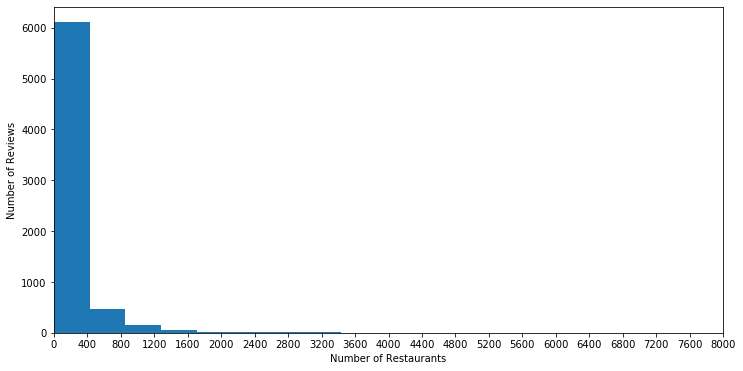

In [9]:
x = LV_reviews.groupby('business_id').count().stars#.value_counts().index
#y = LV_reviews.groupby('business_id').count().stars.value_counts().values

plt.figure(figsize=(12,6))
plt.xticks(np.arange(min(x), max(x), 400.0))
plt.xlim(0,8000)

plt.hist(x,bins=20)
plt.xlabel('Number of Restaurants')
plt.ylabel('Number of Reviews')

In [17]:
LV_restaurants[LV_restaurants.business_id=='ZIWxmLautrCA56eowGQWFg']

,is_open,state,attributes,postal_code,latitude,longitude,name,city,business_id,categories,address,stars,review_count,checkin_count,merc_x,merc_y,categories_list
5068,1,NV,{'RestaurantsPriceRange2': '3'},89109.0,36.136285,-115.151412,Perk Place,Las Vegas,ZIWxmLautrCA56eowGQWFg,"Bakeries, Coffee & Tea, Food",3000 Paradise Rd,2.0,3,5.0,-1.281860e+07,4.319390e+06,"[Bakeries, Coffee & Tea, Food]"


In [12]:
LV_reviews[LV_reviews.business_id=='ZIWxmLautrCA56eowGQWFg']

,business_id,stars,review,user_id
919168,ZIWxmLautrCA56eowGQWFg,1.0,"Over priced burnt coffee, bad service, breakfa...",ioBtCtnHaJV3GH5JqLW2kA
919169,ZIWxmLautrCA56eowGQWFg,4.0,I just bought a hot breakfast croissant sandwi...,NpCKcLnZ9KgSuMRXvURcYA
919170,ZIWxmLautrCA56eowGQWFg,1.0,It's infrequent for me to find something compl...,YwaKGmRNnSa3R3N4Hf9jLw


## User Dataframe

In [41]:
#Final dataset to be loaded into a dataframe is the information on users  
user=pd.read_csv('dataset-capstone/user.csv',low_memory=False)

In [42]:
user.shape

(1637138, 22)

In [43]:
user.head()

,friends,compliment_hot,compliment_writer,compliment_photos,compliment_profile,cool,compliment_list,compliment_funny,useful,review_count,...,compliment_plain,funny,elite,fans,yelping_since,name,user_id,average_stars,compliment_cute,compliment_cool
0,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",2,2,0,0,25,0,1,84,95,...,1,17,"2015,2016,2017",5,2013-10-08 23:11:33,Rashmi,l6BmjZMeQD3rDxWUbiAiow,4.03,0,1
1,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1,0,0,0,16,0,1,48,33,...,0,22,NaN,4,2013-02-21 22:29:06,Jenna,4XChL029mKr5hydo79Ljxg,3.63,0,1
2,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,0,0,0,10,0,0,28,16,...,0,8,NaN,0,2013-10-04 00:16:10,David,bc8C_eETBWL0olvFSJJd0w,3.71,0,0
3,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",1,1,0,0,14,0,0,30,17,...,2,4,NaN,5,2014-05-22 15:57:30,Angela,dD0gZpBctWGdWo9WlGuhlA,4.85,0,0
4,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",28,25,5,0,665,1,80,1114,361,...,57,279,"2015,2016,2017,2018",39,2013-10-23 07:02:50,Nancy,MM4RJAeH6yuaN8oZDSt0RA,4.08,0,80


In [44]:
user.columns

Index(['friends', 'compliment_hot', 'compliment_writer', 'compliment_photos',
       'compliment_profile', 'cool', 'compliment_list', 'compliment_funny',
       'useful', 'review_count', 'compliment_more', 'compliment_note',
       'compliment_plain', 'funny', 'elite', 'fans', 'yelping_since', 'name',
       'user_id', 'average_stars', 'compliment_cute', 'compliment_cool'],
      dtype='object')

Create a number of friends column for the user dataframe. This can help to show how active is the user on the platform

In [45]:
user.friends=user.friends.str.split(',')

In [46]:
user['friends_count']=user.friends.str.len()
user.head()



,friends,compliment_hot,compliment_writer,compliment_photos,compliment_profile,cool,compliment_list,compliment_funny,useful,review_count,...,funny,elite,fans,yelping_since,name,user_id,average_stars,compliment_cute,compliment_cool,friends_count
0,"[c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz...",2,2,0,0,25,0,1,84,95,...,17,"2015,2016,2017",5,2013-10-08 23:11:33,Rashmi,l6BmjZMeQD3rDxWUbiAiow,4.03,0,1,99
1,"[kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGT...",1,0,0,0,16,0,1,48,33,...,22,NaN,4,2013-02-21 22:29:06,Jenna,4XChL029mKr5hydo79Ljxg,3.63,0,1,1152
2,"[4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzM...",0,0,0,0,10,0,0,28,16,...,8,NaN,0,2013-10-04 00:16:10,David,bc8C_eETBWL0olvFSJJd0w,3.71,0,0,15
3,"[RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN...",1,1,0,0,14,0,0,30,17,...,4,NaN,5,2014-05-22 15:57:30,Angela,dD0gZpBctWGdWo9WlGuhlA,4.85,0,0,525
4,"[mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6D...",28,25,5,0,665,1,80,1114,361,...,279,"2015,2016,2017,2018",39,2013-10-23 07:02:50,Nancy,MM4RJAeH6yuaN8oZDSt0RA,4.08,0,80,231


In [47]:
user=user.rename(columns = {"average_stars": "user_average_stars","review_count":"user_review_count"})
user.shape

(1637138, 23)

In [48]:
user_df=user[['user_id','user_average_stars','user_review_count']]
user_df=user_df[user_df.user_review_count>10]
user_df.shape

(531104, 3)

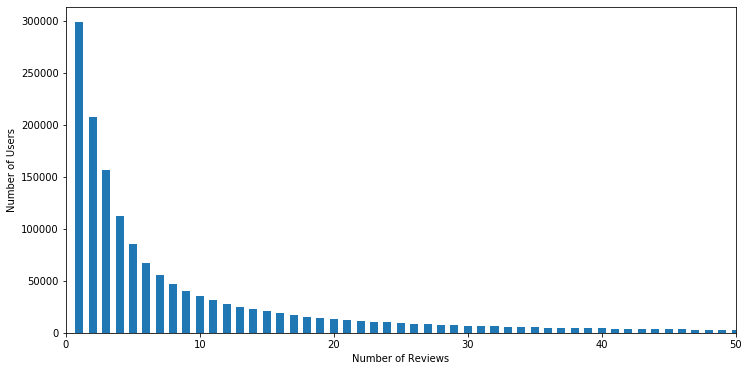

In [49]:
# plot a histogram of number of reviews we have for users in our dataset

x = user.user_review_count.value_counts().index
y = user.user_review_count.value_counts().values

plt.figure(figsize=(12,6))
plt.xlim(0,50)
plt.bar(x, y, width=.6)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
#plt.title('Number of Users by Review')
plt.savefig('users.png')

In [50]:
user_df.groupby(by=['user_review_count']).size()


user_review_count
11       31178
12       28030
13       24626
14       22545
15       20598
         ...  
7750         1
9821         1
10022        1
12390        1
13278        1
Length: 1780, dtype: int64

In [53]:
user.user_review_count.value_counts()

1       298779
2       207849
3       156478
4       112314
5        85060
         ...  
1424         1
1588         1
1475         1
1932         1
2229         1
Name: user_review_count, Length: 1791, dtype: int64

# Below this point is the work done for the application process

## Data Cleaning

In order to create the new review dataframe on which the project will be based, I will add the number of checkins to the business dataframe and then merge the business dataframe to the rerview dataframe. In addition the user dataframe can be used in parallel to gain insights on the users that made the reviews. To keep the size of the dataframe small, the user dataframe will not be joined for the time

In [54]:
#add number of checkins to the business dataframe

business=pd.merge(how='left',left=business,right=checkin, left_on='business_id', right_on='business_id')
business.shape

(59371, 14)

In [55]:
business.head()

,is_open,state,postal_code,latitude,longitude,name,city,business_id,categories,address,stars,review_count,date,checkin_count
0,1,ON,L5R 3E7,43.605499,-79.652289,Emerald Chinese Restaurant,Mississauga,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",30 Eglinton Avenue W,2.5,128,"[2010-07-05 16:56:31, 2010-12-21 20:30:01, 2...",455.0
1,1,NC,28210,35.092564,-80.859132,Musashi Japanese Restaurant,Charlotte,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese","10110 Johnston Rd, Ste 15",4.0,170,"[2010-11-13 01:00:36, 2010-12-19 00:49:15, 2...",721.0
2,1,AZ,85016,33.495194,-112.028588,Taco Bell,Phoenix,1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",2450 E Indian School Rd,3.0,18,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 2...",90.0
3,1,OH,44060,41.708520,-81.359556,Marco's Pizza,Mentor-on-the-Lake,fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",5981 Andrews Rd,4.0,16,"[2010-09-26 23:14:40, 2010-09-27 01:36:58, 2...",5.0
4,0,NV,89119,36.100016,-115.128528,Carluccio's Tivoli Gardens,Las Vegas,PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian","1775 E Tropicana Ave, Ste 29",4.0,40,"[2010-03-05 03:54:37, 2010-07-15 03:43:42, 2...",17.0


In [56]:
#create a new dataset from the business df with only business ids, names, stars and review counts to join to the review dataset

restaurants=business[['business_id','name','stars','review_count','checkin_count']]
restaurants=restaurants.rename(columns = {"stars": "res_average_stars",'name':'restaurant_name','review_count':'res_review_count'})
restaurants.sort_values(by='res_review_count')

,business_id,restaurant_name,res_average_stars,res_review_count,checkin_count
29685,yUBCkEWsN8c-mMteKx3ehA,Subway,1.5,3,37.0
4390,bADmX3gPwiFQXU__6Out3w,Select Sandwich,2.5,3,2.0
48671,i4f-968MWX1Jnu1tkHSwfw,Oriental Century Palace Chinese Restaurant,3.5,3,1.0
19826,7yZyfWTmhd5_OmZfM3wjEg,Subway,2.5,3,1.0
19837,KZEmp6MJQXGLjD1k-tA0Vw,Karpaty Pastry & Deli,4.5,3,1.0
...,...,...,...,...,...
43638,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,4.0,5484,13986.0
18103,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,4.0,5763,14576.0
10710,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3.5,6708,22225.0
27467,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,4.0,8339,28872.0


We can plot a histogram of the review count to see the range of review counts and eventually only keep the established restaurants for the ML model

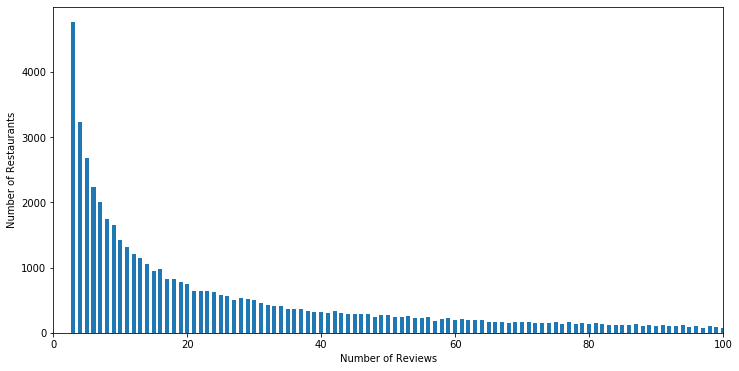

In [57]:
# plot a histogram of number of reviews we have for restaurants in our dataset
x = restaurants.res_review_count.value_counts().index
y = restaurants.res_review_count.value_counts().values

plt.figure(figsize=(12,6))
plt.xlim(-0, 100)
plt.bar(x, y, width=.6)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
#plt.title('Number of Restaurant by Review')
plt.savefig('resrev.png')


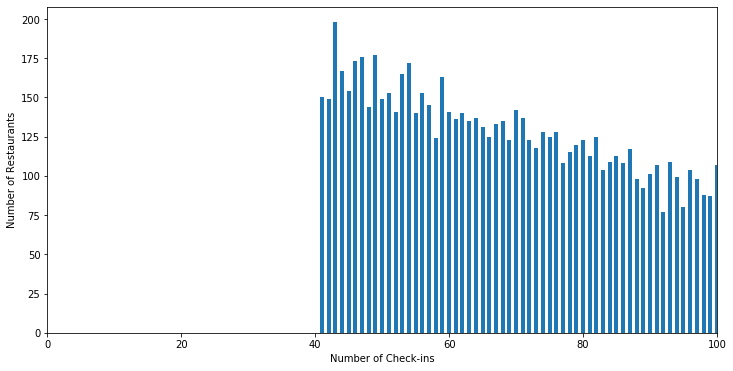

In [317]:
# plot a histogram of number of checkins we have for restaurants in our dataset
x = restaurants.checkin_count.value_counts().index
y = restaurants.checkin_count.value_counts().values

plt.figure(figsize=(12,6))
plt.xlim(-0, 100)
plt.bar(x, y, width=.6)
plt.xlabel('Number of Check-ins')
plt.ylabel('Number of Restaurants')
#plt.title('Number of Restaurant by Check-in')
plt.savefig('rescheck.png')

We will keep only the restaurants that have more than 20 reviews AND 40 checkins

In [58]:
restaurants=restaurants[restaurants.res_review_count>20]
restaurants=restaurants[restaurants.checkin_count>40]

restaurants.shape

(24431, 5)

In order to create the final dataframe I will add the restaurants to the review dataset

In [59]:
#join the restaurants and reviews datasets keeping reviews only for the restaurants

merged=pd.merge(how='inner',left=review,right=restaurants, left_on='business_id', right_on='business_id')
merged=pd.merge(how='inner',left=merged,right=user_df,left_on='user_id',right_on='user_id')
merged.shape


(2732953, 15)

In [60]:
merged.isnull().sum(axis = 0)

useful                0
stars                 0
review_id             0
funny                 0
date                  0
user_id               0
cool                  0
text                  1
business_id           0
restaurant_name       0
res_average_stars     0
res_review_count      0
checkin_count         0
user_average_stars    0
user_review_count     0
dtype: int64

There is a row with a null value in the reviews which needs to be dropped before I create the column with the length of the review.


In [61]:
merged.dropna(inplace=True)
merged['review_length'] = merged.text.map(len)

In [62]:
merged.head()

,useful,stars,review_id,funny,date,user_id,cool,text,business_id,restaurant_name,res_average_stars,res_review_count,checkin_count,user_average_stars,user_review_count,review_length
0,1,5.0,Ci7eLn5l1X1UTIe0COaCrA,0,2015-06-08 18:51:54,y0X59ZwPp89jVkceROxTtA,0,One of the best Italian restaurants in a city ...,eU_713ec6fTGNO4BegRaww,La Tavola Italiana,3.5,132,96.0,4.15,20,385
1,0,4.0,BVDLUZbUUDDIHt8QD5zjSw,0,2015-12-08 16:04:39,y0X59ZwPp89jVkceROxTtA,0,Always a fan of Emporio. Would like to see the...,sMzNLdhJZGzYirIWt-fMAg,Sienna Mercato,4.0,752,1668.0,4.15,20,277
2,0,4.0,G97dACe2XZQWQloZmWvOaw,0,2015-08-12 12:01:25,y0X59ZwPp89jVkceROxTtA,0,Kaya continues to impress. Been there for the ...,Ul6JwluSTm12PVDIqnNaTg,Kaya,4.0,633,1432.0,4.15,20,464
3,0,5.0,DGIaVHcGfk33Hk8npeNX3A,0,2015-06-08 18:03:19,y0X59ZwPp89jVkceROxTtA,0,Casa Rasta is slowing becoming one of my favor...,wdwODzBChLIh_u8V8CPpyA,Casa Rasta,3.5,107,177.0,4.15,20,529
4,0,3.0,s7PWRrqmX1DyGiEJDu_JuQ,0,2014-03-11 13:45:29,y0X59ZwPp89jVkceROxTtA,0,Not for the picky eater. Stopped in for a drin...,bCa0CY4F74N5lCEVOquKkg,G & G Noodle Bar,4.0,282,528.0,4.15,20,348


In [63]:
merged.shape

(2732952, 16)

## Part 2. Create the Dataframe for the ML model
We can now keep the text and the numerical columns for the ML models

In [64]:
merged=merged[['text','stars','res_average_stars','user_average_stars','review_length']]

In [65]:
merged.shape

(2732952, 5)

In [66]:
merged.head()

,text,stars,res_average_stars,user_average_stars,review_length
0,One of the best Italian restaurants in a city ...,5.0,3.5,4.15,385
1,Always a fan of Emporio. Would like to see the...,4.0,4.0,4.15,277
2,Kaya continues to impress. Been there for the ...,4.0,4.0,4.15,464
3,Casa Rasta is slowing becoming one of my favor...,5.0,3.5,4.15,529
4,Not for the picky eater. Stopped in for a drin...,3.0,4.0,4.15,348


The final dataframe that has information on the reviews and the restaurants that the reviews were made on is called merged.


5.0    1002711
4.0     830285
3.0     427323
2.0     253776
1.0     218857
Name: stars, dtype: int64


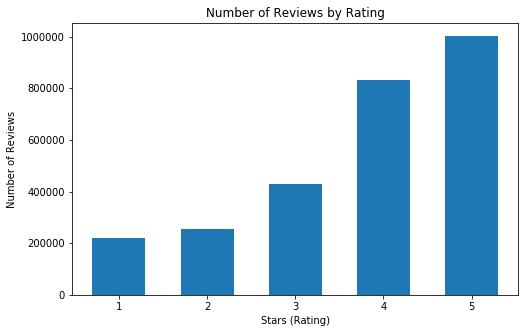

In [67]:
# plot how many reviews we have of each star
x = merged.stars.value_counts().index
y = merged.stars.value_counts().values
print(merged.stars.value_counts())
plt.figure(figsize=(8,5))
plt.bar(x, y, width=.6)
plt.xlabel('Stars (Rating)')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Rating')
plt.savefig('reviewsbyrating.png')

It looks like there are many more positive (4 or 5 stars) than negative and neutral reviews (1 2 or 3 stars). One interesting thing would be to divide the dataset into these two categories in order to realize which words trigger positive and which workds trigger negative reviews. I will consider negative reviews up to the 2 star reviews and get rid of 3 star reviews for the NLP mdoel

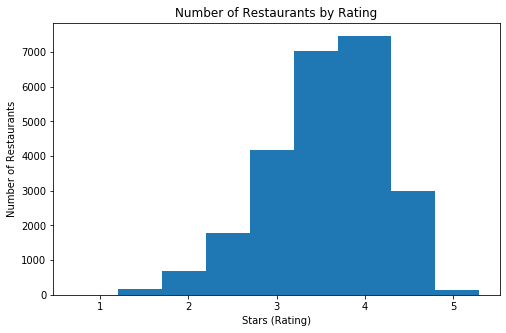

In [68]:
# plot how many restaurants we have of each star rating
x = restaurants.res_average_stars.value_counts().index
y = restaurants.res_average_stars.value_counts().values

plt.figure(figsize=(8,5))
plt.bar(x, y, width=.6)
plt.xlabel('Stars (Rating)')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by Rating')

plt.savefig('restraurantsbyreview.png')


There is an incosistency between the review rating and the average business rating in the dataset that might be worthy to investigate further.



In [69]:
merged_all=merged.copy()
merged=merged[merged.stars!=3]
merged["is_negative"] = merged.stars.apply(lambda x: 1 if x < 4 else 0)
pos_reviews = merged[merged.is_negative==0]
neg_reviews = merged[merged.is_negative==1]
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  1,832,996
Negative Reviews:  472,633


In [70]:
merged.head()

,text,stars,res_average_stars,user_average_stars,review_length,is_negative
0,One of the best Italian restaurants in a city ...,5.0,3.5,4.15,385,0
1,Always a fan of Emporio. Would like to see the...,4.0,4.0,4.15,277,0
2,Kaya continues to impress. Been there for the ...,4.0,4.0,4.15,464,0
3,Casa Rasta is slowing becoming one of my favor...,5.0,3.5,4.15,529,0
5,After hearing rave reviews from a number of fr...,2.0,3.5,4.15,2351,1


Next we can check how the review score is affected by the review length

<Figure size 1440x720 with 0 Axes>

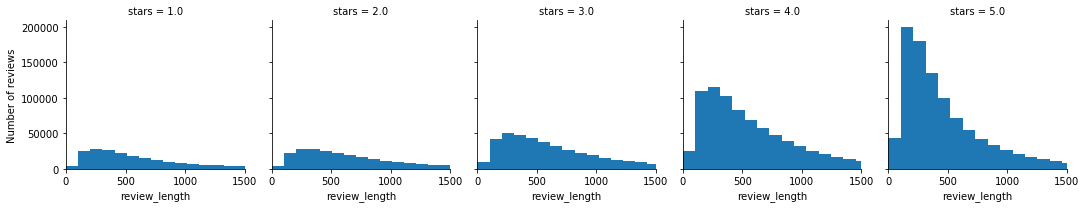

<Figure size 1440x720 with 0 Axes>

In [71]:
# check how the review lengths are distributed
ax = sns.FacetGrid(data=merged_all, col='stars', xlim=(0, 1500)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='Number of reviews')
plt.savefig('reviewlength.png')
plt.figure(figsize=(20,10))

## Part 3. Create Wordclouds

It looks like all the reviews have the same distribution in length regardless the stars. This shows us that the length of the review is not indicative of the resulting rating and will not be used for the rest of the analysis.

It will be interesting to create word clouds for the positive and negative reviews to see if there is a consistency in words used associated with each rating. For the purposed of this analysis we will review around 100000 positive and negative reviews out of the 3m+ total reviews

In [72]:
pos_reviews=pos_reviews.sample(frac = 0.05, replace = False)
pos_reviews.shape

(91650, 6)

In [73]:
pos_text_sample = " ".join(review for review in pos_reviews.text)


In [74]:
len(pos_text_sample)

54466558

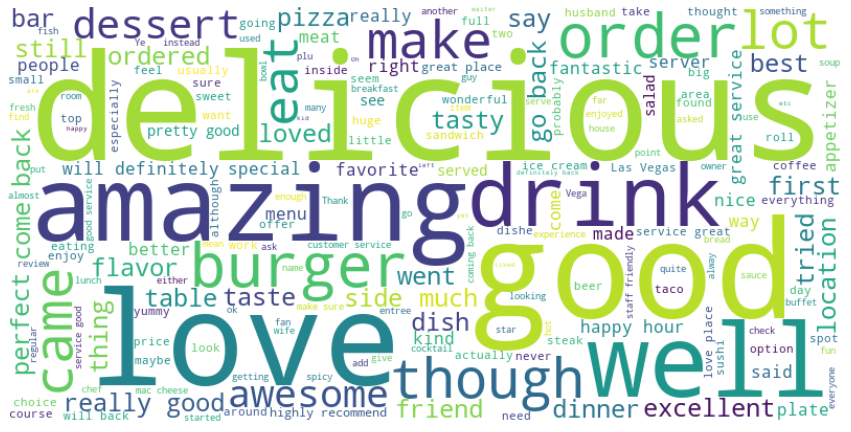

In [76]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
stopwords = set(STOPWORDS)

stopwords.update(["restaurant", "one",'food','got','think','meal','even','time','now','know'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color="white").generate(pos_text_sample)

# Display the generated image:

plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.savefig('positivev1.png')
plt.show()


The word cloud associated with positive reviews clearly shows words that are associated with higher scores. This can show that we can build a sentiment model which will predict the scores of revies

In [77]:
neg_reviews=neg_reviews.sample(frac = 0.25, replace = False)
neg_reviews.shape

(118158, 6)

In [78]:
neg_text_sample = " ".join(review for review in neg_reviews.text)

In [79]:
len(neg_text_sample)

89816215

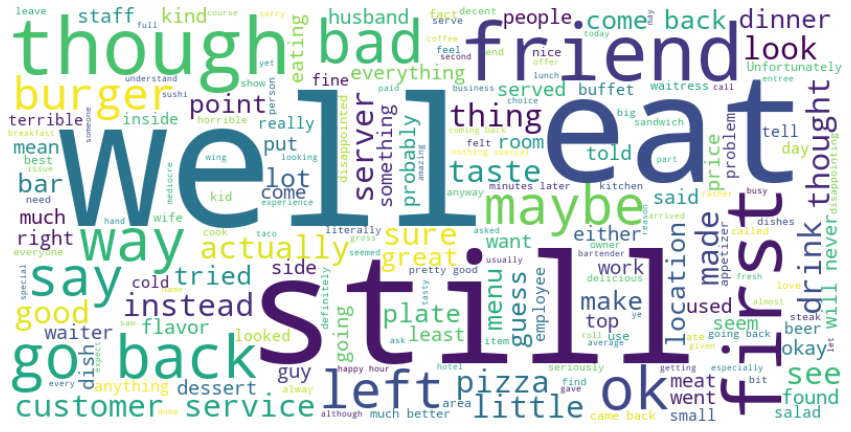

In [80]:
# Generate a word cloud image

wordcloud2 = WordCloud(stopwords=stopwords, width=800, height=400,background_color="white").generate(neg_text_sample)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('negativev1.png')
plt.show()


The wordcloud associated with 1 and 2 star reviews seems not very representative of negative words like the positive one

## Part 4. Text Cleaning

To clean textual data, we call our custom ‘clean_text’ function that performs several transformations:

-tokenize the text (split the text into words) and remove the punctuation

-remove useless words that contain numbers

-remove useless stop words like ‘the’, ‘a’ ,’this’ etc.

-Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet 
lexical database

-lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [81]:
reviews_df=merged[['text','is_negative']].sample(frac =0.1, replace = False, random_state=1)

reviews_df.shape

(230563, 2)

In [94]:
# return the wordnet object value corresponding to the POS tag
import nltk
import string
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

def clean_text(text):

    # tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


In [95]:
# clean text data
reviews_df["review_clean"] = reviews_df["text"].apply(lambda x: clean_text(x))

In [96]:
reviews_df.head()

,text,is_negative,review_clean
1241513,Let me start off by saying we only went here b...,1,Let start say go rank top wing Arizona good st...
2265517,If I were on death row and asked what I wanted...,0,If death row ask want last meal would definite...
1348352,Glad we have a Dewey's on the west side now. E...,0,Glad Dewey's west side Enjoy Green Lantern Pizza
1845453,My review is only for dimsums as I haven't tri...,0,My review dimsums try anything else love dimsu...
1463232,There's a man pulling noodles right at the fro...,0,There's man pull noodle right front put straig...


In [97]:
reviews_df.shape

(230563, 3)

In [98]:
reviews_df[reviews_df.is_negative==0].shape

(183356, 3)

In [99]:
reviews_df[reviews_df.is_negative==1].shape

(47207, 3)

In [100]:
print('Example of Text Processing \n')
print('Review before processing: \n' , reviews_df.iloc[1,0],'\n')
print('Review after processing: \n' , reviews_df.iloc[1,2])

Example of Text Processing 

Review before processing: 
 If I were on death row and asked what I wanted for my last meal, it would definitely be a Primanti Bros sandwich. I've been going to Primanti Bros for years and whenever I come back to Da Burgh, I always stop here.

You don't go here for the decor or atmosphere. You go for the most unique sandwich this side of the Mississippi. When deciding on a sandwich go for the Kolbassi -- you won't be disappointed. Yes, its greasy. Yes, its a gut bomb. and Yes, it will be the best sandwich you've had in LONG time.  

No person can truly say they've been to Pittsburgh until they've been to Primanti Bros and washed it all down with an Iron City. 

Review after processing: 
 If death row ask want last meal would definitely Primanti Bros sandwich I've go Primanti Bros year whenever come back Da Burgh always stop here.

You go decor atmosphere You go unique sandwich side Mississippi When decide sandwich go Kolbassi disappoint Yes greasy Yes gut b